

## Linear Regression Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Let's first generate some data

We are going to generate this data assuming that the mean of gaussian noise is 0 and its variance is known.

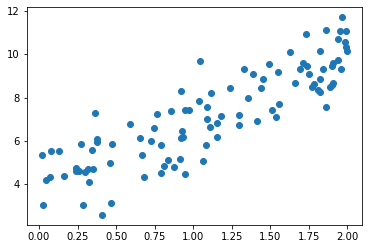

In [2]:
# Generate random inputs
X = 2 * np.random.rand(100,1)

# Generate random data which consist of added Gaussian noise onto the line y = 4 + 3X
y = 4 + 3 * X + np.random.randn(100,1)

plt.scatter(X,y)

## Ordinary Least Squares

The data we have generated seems like it can be explained through a linear function. Therefore, an Ordinary Least Squares (OLS) fit is a sensible idea. With OLS, we aim to find a line such that the error between the datapoints and our estimates are minimized. This can be mathematically expressed as minimizing the residual sum of squares.

$$
RSS = \sum_{i=1}^n (y_i - f(x_i))^2
$$

Where, $f()$ is the transformation applied to the inputs through the parameters. The result of this transformation is our estimate. In ordinary least squares, our estimates can be calculated by taking the dot product of a parameter set and an input vector. For simplicity of notation we express the linear model as the dot product of a single parameter vector and a single input vector. We do this by augmenting the feature vector $X$ to include a 1 and augmenting the parameter vector $\theta$ to include the bias term. 

 $$Y = \theta X$$

 Where the dot product $\theta x = \theta_{0}.x_{0} + \theta_{1}.x_{1} + .... +\theta_{n}.x_{n}$, where $x_{0}$ is always 1.

Now, let's apply the Ordinary Least Squares method to fit a line through the data. Using a closed-form solution to obtain the best set of theta parameters that minimizes the RSS equation:

$$ \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [3]:
# Concatanating a column of ones to the feature vector
X_b = np.c_[np.ones((100,1)),X]

# Finding the parameter set using the closed-form solution
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.82507378],
       [3.03912845]])

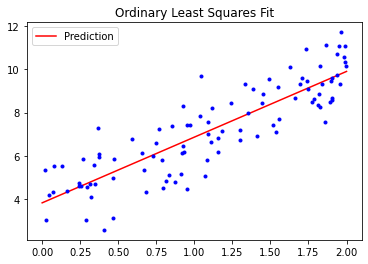

In [4]:
# For plotting 
X_new = np.array([[0], [2]])
# Add x0 = 1 to each instance
X_new_b  = np.c_[np.ones((2, 1)), X_new] 
# To create a continuous line (red line below) we take the dot product of theta and each point on the X-axis
y_predict = X_new_b.dot(theta_best)


plt.plot(X_new, y_predict, "r-",label ='Prediction')
plt.plot(X,y,"b.")
plt.title("Ordinary Least Squares Fit")
plt.legend()
plt.show()

## Finding a parameter set using Maximum Likelihood Estimation

The additive Gaussian noise is assumed to be independently and identically distributed with 0 mean and $\sigma^2$ variance and can be expressed as follows: 
$$ \epsilon \sim \mathcal{N}(0,\sigma^2)   $$

Our Linear Regression Model looks like:

$$Y = \theta X + \epsilon$$

This causes $Y_{i}$ to be normally distributed as well, as the $\theta_{i}$ and $X_{i}$ parameters are constant. In other words, the deviation from the line is only due to the added noise. In order to find a a distribution for our estimates, we can find expressions for the variance and expected value. Starting with variance: 

$$Var(Y_{i}) = Var(\theta_{i} X_{i} + \epsilon_{i})$$

As the noise is the only thing that is variable, we can set the variance of our estimates to that of the noise.

$$Var(Y_{i}) = Var(\epsilon_{i})$$

Since the initial assumption for the noise was 0 mean and 
$\sigma^2$ variance. Moving on to the expected value:

$${\mathbb{E}}[Y_{i}] = \theta_{i} X_{i} + {\mathbb{E}}[\epsilon_{i}]$$
Since from our assumption the mean value of noise is 0,
$${\mathbb{E}}[\epsilon_{i}] = 0$$

$${\mathbb{E}}[Y_{i}] = \theta_{i} X_{i} $$

We now know what the distribution for our Y looks like.

$$ Y_{i} \sim \mathcal{N}(\theta_{i} X_{i},\sigma^2)   $$

Thus the probability density function (pdf) for a single $Y_{i}$ can be written as follows:

$$ f(Y_{i}|\theta, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(Y_{i} - \theta_{i} X_{i})^2}{2\sigma^2}\right)$$

If we want the likelihood for these parameters given all the $Y_{i}$'s, we need to multiply the above pdf for each $Y_{i}$, which gives us the following expression:

$$ \mathcal{L}(\theta, \sigma^2|Y_{i},...,Y_{n}) = \prod_{i=1}^{n} f(Y_{i}|\theta, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(Y_{i} - \theta_{i} X_{i})^2}{2\sigma^2}\right)$$

If we take the logarithm of both sides, we will get the log-likelihood (negative) function. The purpose of using the logarithm here is to turn the product into a sum of log probabilities, which helps us to avoid a repeated application of the product rule [3].

$$ \ell(\theta, \sigma^2|Y_{i},...,Y_{n}) = -\sum_{i=1}^{N} \frac{(Y_{i} - \theta_{i} X_{i})^2} {(2 \sigma^2)} - \frac{n \cdot log(2\pi \sigma^2)} {2}$$


From this, we need to find a $\theta$ value that maximizes the summation expression, $-\sum_{i=1}^{N} (Y_{i} - \theta_{i} X_{i})^2$, which is identical to the problem of minimizing the Ordinary Least Squares function that we found earlier. We are able to reduce our overall expression to just this, as the terms that do not contain $\theta$ can be considered constant. As a result, MLE will give us the same solution as the OLS estimate.



### Using Gradient Descent and Maximum Likelihood Estimation to estimate parameters in Linear Regression
Although performing gradient ascent on the likelihood function we obtained is unneccessary [3] as a closed form solution exists, we can still go ahead and see how it does. Firstly, we are going to need to find the gradient of our cost function. We can obtain the gradient vector [2] by taking the partial derivative of the cost function (MSE) with respect to each parameter. We have only 2 parameters in our simple example, namely bias and slope.

$$
\nabla_{\theta}MSE(\theta) = \left[\begin{array}{c}
\dfrac{\partial MSE(\theta)}{\partial \theta_{0}}(\left.\theta_{0}, \theta_{1}, \ldots, \theta_{n}\right) \\
\dfrac{\partial MSE(\theta)}{\partial \theta_{1}}(\left.\theta_{0}, \theta_{1}, \ldots, \theta_{n}\right)  \\
\vdots \\
\dfrac{\partial MSE(\theta)}{\partial \theta_{n}}(\left.\theta_{0}, \theta_{1}, \ldots, \theta_{n}\right) 
\end{array}\right] = \frac{2}{m}X^\top(X\theta - y)
$$

Next, the parameters are updated as follows given a learning rate:

$$ \theta_{next step} = \theta_{current} - \eta \nabla_{\theta}MSE(\theta_{current}) $$

The code that implements this can be found in the following cell.

[[3.82507378]
 [3.03912845]]


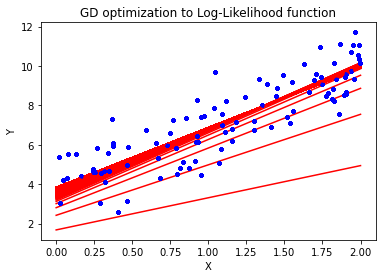

In [5]:

eta = 0.1 # learning rate/ stepsize
n_iterations = 1000  #number of iterations
m = 100  #number of datapoints

def gd_optimizer(eta,n_iterations,m):
    # Random initialization of parameters
    theta = np.random.randn(2,1) 
    for iteration in range(n_iterations):
        # Partial derivative of Mean Squared Error function with rexpect to theta parameters
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        # Taking a step in the direction of the gradient, the size of the step is determined by eta  
        theta = theta - eta * gradients
        # Make a prediction for every X value on the current axis
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-",label = "Fitted line")
        plt.plot(X,y,"b.")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('GD optimization to Log-Likelihood function')
    return theta 

theta_set = gd_optimizer(eta,n_iterations,m)
y_predict = X_new_b.dot(theta_set)
print(theta_set)

As a result, we obtain the same parameter set as the closed-form solution, using Gradient Descent. Also from the visualization above, it is possible to see how GD progressively tweaks the parameter values (starting with random and bad estimates) and arrives at a final solution, instead of the closed-form solution, which provided the solution directly.

## MLE using features

We can extend the idea from the previous section to describe nonlinear trends in data. The "Linear" in linear regression entails that the parameters must be linear. But we can apply nonlinear transformations on our inputs, and linearly combine the outputs, which does not violate any conditions. We can start by replacing input vector $X$ with a feature vector $\phi$. With this addition, the linear regression model becomes:

$$ 
y = \phi(x)^T \theta + \epsilon = \sum_{k=0}^{K-1} \theta_k \phi_k (x) + \epsilon
$$

For example, if we wanted to perform polynomial regression our inputs might go through a transformation such as below:

$$ 
\phi(x) = \begin{bmatrix} \phi_0(x)\\ \phi_1(x)\\ \vdots\\ \phi_{K-1}(x) \end{bmatrix} = \begin{bmatrix} 1\\ x\\ x^2 \\ \vdots\\ x^{K-1} \end{bmatrix} \in \mathbb{R}^K
$$

If the polynomial has an order of 2, the feature matrix would look like as follows:

$$
\Phi := \begin{bmatrix} 
1 & x_{1} & x_{1}^{2}\\
1 & x_{2} & x_{2}^{2}\\
\vdots & \vdots & \vdots\\
1 & x_{n} & x_{n}^{2}\\
\end{bmatrix}
$$

Having transformed our input vectors, we can find MLE estimates following the same procedure as the feature-free scenario. Turns out, the solution for finding the best parameters we obtain is the same, except the input vector X is replaced with the feature matrix $\Phi$.

$$
\theta_{ML} = (\Phi^T \Phi)^{-1} \Phi^T y
$$

### Generate a sinusoidal function with noise and fit a polynomial curve 

In order to test polynomial fits, let's create some nonlinear data.

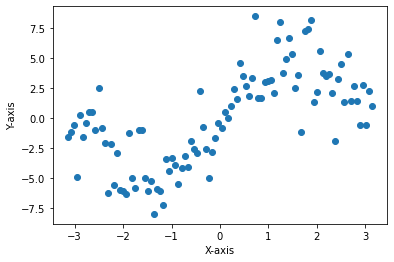

In [6]:
X_sin = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(X_sin)*5
noise = np.random.normal(0, 2, y_sin.shape)
y_sin += noise
y_sin.size
plt.scatter(X_sin, y_sin)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

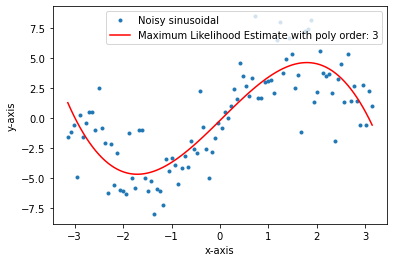

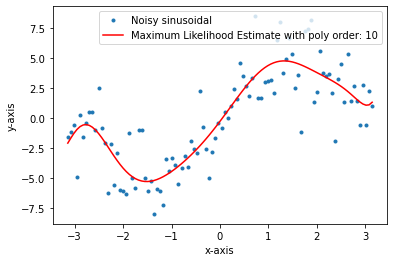

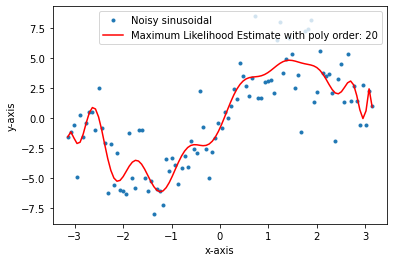

In [7]:

# This function generates feature matrix according to the desired degree of the polynomial fit
def feature_matrix(X, K):
    #X_flat = X.flatten()
    n = X.shape[0]
    # Initialize an empty matrix with n rows and K+1 columns
    feature_mat = np.zeros((n, K+1))
    for k in range(K+1):
        feature_mat[:,k] = X**k
    return feature_mat


def find_mle(Phi, y):
    # maximum likelihood estimate with feature matrix
    thetas = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(y)
    return thetas
    
#Fitting a polynomial of order 3
phi3 = feature_matrix(X_sin,3)
estimates3 = find_mle(phi3,y_sin)
predictions3  = np.dot(phi3, estimates3)

#Fitting a polynomial of order 10
phi10 = feature_matrix(X_sin,10)
estimates10 = find_mle(phi10,y_sin)
predictions10  = np.dot(phi10, estimates10)

#Fitting a polynomial of order 20
phi20 = feature_matrix(X_sin,20)
estimates20 = find_mle(phi20,y_sin)
predictions20  = np.dot(phi20, estimates20)

X_test = np.linspace(-np.pi,np.pi,100).reshape(-1,1)

def plotter(X_data,Y_data,X_testing,Predictions,poly_degree):
    plt.figure()
    plt.plot(X_data, Y_data, '.', label='Noisy sinusoidal')
    plt.plot(X_testing, Predictions, 'r', label='Maximum Likelihood Estimate with poly order: {}'.format(poly_degree))
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend()
    plt.show()
    pass

plotter(X_sin,y_sin,X_test,predictions3,3)
plotter(X_sin,y_sin,X_test,predictions10,10)
plotter(X_sin,y_sin,X_test,predictions20,20)

We have successfully performed polynomial regression using a Maximum Likehood Estimation model with features, on a sinusoidal signal with noise. Therefore, we have seen that it's possible to apply linear regression to nonlinear datasets. Low degrees do not fit the data well and we become more prone to overfitting as the degree of the polynomial increases. If the model overfits to the data it's trained on, it will not generalize well to unseen data. We will explore this problem in a later section. Therefore the goal here is to find an optimal polynomial degree. Nonetheless we can use Maximum Aposteriori Estimation instead of Maximum Likelihood to prevent overfitting to a degree.  

## Maximum Aposteriori Estimation

Earlier, we used MLE to estimate the parameters in a regression task. With MLE, we did not consider prior information about the parameters. Considering the main statement of Bayes' Theorem, our purpose is to find the probability of scenario Y given some data X.

$$\underbrace{P(Y|X)}_{\text{posterior}} = \frac{ \overbrace{P(X|Y)}^{\text{likelihood}} \overbrace{P(Y)}^{\text{prior}} } {\underbrace{P(X)}_{\text{evidence}}}  $$

If we use MLE, since we do not use a prior, the expression can be reduced to the following:

$$\underbrace{P(Y|X)}_{\text{posterior}} \propto \underbrace{P(X|Y)}_{\text{likelihood}} $$

MLE consists simply of maximizing the RHS (likelihood) of the above expression. In contrast, Maximum Aposteriori Estimation (MAP) takes into account a prior distribution of the parameters:
 

$$\underbrace{P(Y|X)}_{\text{posterior}} \propto \overbrace{P(X|Y)}^{\text{likelihood}} \overbrace{P(Y)}^{\text{prior}} $$ 

Specifically in our regression case, this becomes:

$$  \underbrace{P(\theta|X,Y)}_{\text{posterior}} \propto \overbrace{P(Y|X,\theta)}^{\text{likelihood}} \overbrace{P(\theta)}^{\text{prior}}  $$

This inclusion of prior information such as $P(\theta) \sim \mathcal{N}(0,1)$ acts as a regularizer, which essentially limits the range of our parameter values. Similar to the process we followed for MLE, we perform a log-transform on the MAP equation we have obtained. This gets us to the function we would like to minimize. 

$$    \theta_{MAP} \in arg \min_{\theta}[-logP(Y|X,\theta) -logP(\theta) ]  $$

Using a Gaussian conjugate prior (allows us to obtain a closed form solution) and a series of operations as before, we get:

$$ \theta_{MAP} = (\Phi^\top\Phi + \frac{\sigma^{2}}{b^{2}}I)^{-1} \Phi^\top y$$

The $\frac{\sigma^{2}}{b^{2}}I$ term in the above expression is the only difference from the MLE solution and it shows the effect of the regularizer term. We can simply turn the above expression into code by using the np.dot() and np.linalg.inv() operators. 


In [8]:
# This function creates MAP estimates
sigma = 1.0
b = 1.0
def map_estimator(phi, Y, sigma, b):
    I = np.eye(phi.shape[1])
    params = np.dot(np.linalg.inv(np.dot(phi.T, phi) + I*(sigma/b)**2), np.dot(phi.T,Y))
    return params

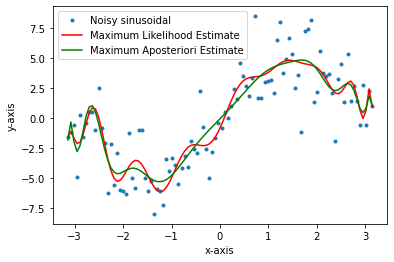

In [9]:
# Using the same feature matrix for MAP and MLE estimates 
phi = feature_matrix(X_sin,20)
estimates = map_estimator(phi,y_sin,sigma,b)
predictions_map  = np.dot(phi, estimates)

#Plotting both estimates on the same graph
plt.figure()
plt.plot(X_sin, y_sin, '.', label='Noisy sinusoidal')
plt.plot(X_test, predictions20, 'r', label='Maximum Likelihood Estimate')
plt.plot(X_test, predictions_map, 'g', label='Maximum Aposteriori Estimate')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

It's shown on the above graph that for a polynomial fit of order 20, the MAP estimate has much less oscillation than that of the MLE. This indicates that MAP estimates are less prone to overfitting thanks to the regularizer term.

### Boston Dataset Polynomial Regression Example

In [10]:

#Dataset explains housing prices in Boston in the 1970's
#Not an external dataset, can call from inside sklearn
from sklearn.datasets import load_boston
from random import shuffle
import pandas as pd
import random

# Loading the Boston housing dataset from sklearn
boston = load_boston()
# seed() allows us to keep the same randomization every time
random.seed(12) 
new_index = list(range(boston.data.shape[0]))
shuffle(new_index)
X, y = boston.data[new_index], boston.target[new_index]
df = pd.DataFrame(X,columns = boston.feature_names)
df['target'] = y
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68,32.5
1,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
2,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17,13.8
3,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3
4,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4


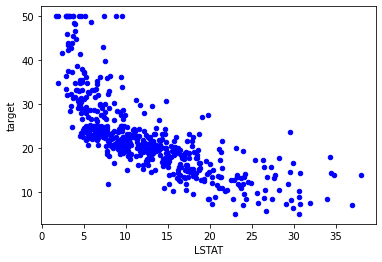

In [11]:
ax = df.plot(kind = 'scatter', x = 'LSTAT', y = 'target', c = 'b')

From a first glance at the data, it looks like there is a nonlinear relationship between the LSTAT (% Lower Status of the population) variable and house prices. A polynomial fit seems suitable for this type of data. Let's take the previous example further and discuss the generalization performance of polynomial fits of different degrees by splitting our data into training and testing sets. We also need an error metric to quantify performance. One of the most commonly used error metrics is Root Mean Square Error (RMSE). The polynomial fits will be done through numpy's polyfit() function. 

$$
RMSE = \sqrt{\sum_{i=1}^n \frac{1}{n} (y_i - f(x_i))^2} 
$$


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

(404,)
(102,)
(404,)
(102,)


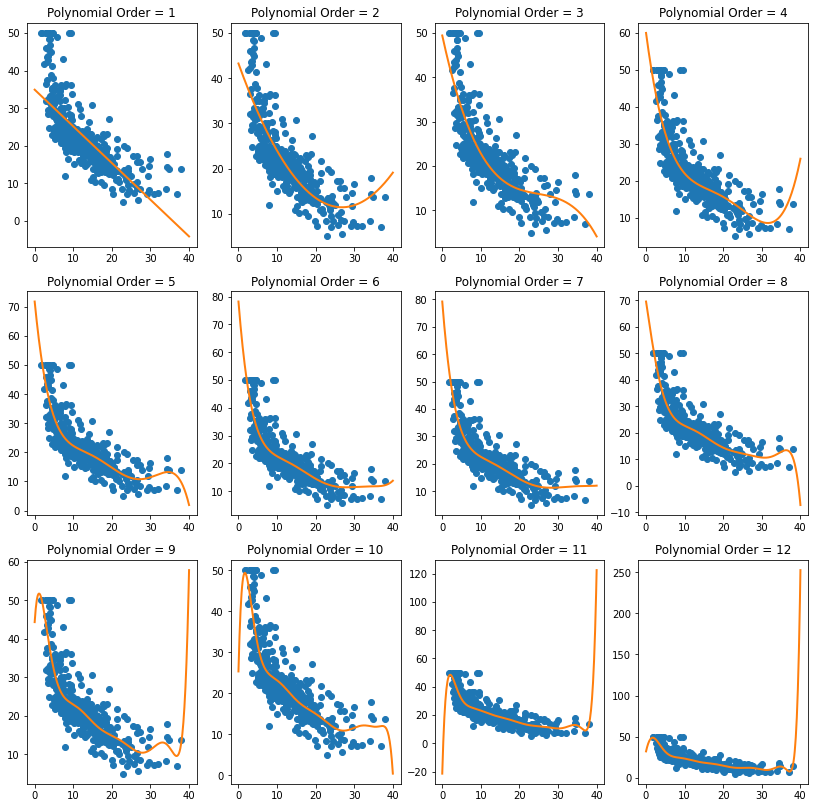

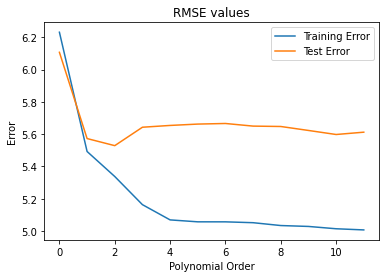

In [13]:
# The below line is a way to perform polynomial regression using numpy
p = np.poly1d(np.polyfit(df['LSTAT'], df.target, 1))
t = np.linspace(0, 40, 300)

# Instead of the whole data, we use a 80/20 split for training and test runs respectively.
X_train, X_test, Y_train, Y_test = train_test_split(df['LSTAT'], df.target, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Creating axes and subplots to show the fitted model and data on the same graph
training_fig = plt.figure(figsize=(14,14))
ax1 = training_fig.add_subplot(3,4,1)
ax2 = training_fig.add_subplot(3,4,2)
ax3 = training_fig.add_subplot(3,4,3)
ax4 = training_fig.add_subplot(3,4,4)
ax5 = training_fig.add_subplot(3,4,5)
ax6 = training_fig.add_subplot(3,4,6)
ax7 = training_fig.add_subplot(3,4,7)
ax8 = training_fig.add_subplot(3,4,8)
ax9 = training_fig.add_subplot(3,4,9)
ax10 = training_fig.add_subplot(3,4,10)
ax11 = training_fig.add_subplot(3,4,11)
ax12 = training_fig.add_subplot(3,4,12)

# To iteratively create figures
ax_list = [1,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
# To store the RMSE values for each polynomial order
store_test_rmse = []
store_training_rmse =[]

# Measuring training and testing performance 
for i in range(1,len(ax_list),1):
    # Increase polynomial degree with each iteration
    poly_model = np.poly1d(np.polyfit(X_train, Y_train, i))
    plt.subplot(3, 4, i)
    ax_list[i].plot(X_train, Y_train,'o', t, poly_model(t), '-',linewidth=2.0)
    # Polyval allows us to evaluate the polynomial (find Y value), given X values 
    # Predicting using test data
    TestPredictions = np.polyval(poly_model, X_test)
    # Predicting using training data
    TrainingPredictions = np.polyval(poly_model, X_train)
    # Testing and Training Absolute Errors
    testing_absError = abs(TestPredictions - Y_test)
    training_absError = abs(TrainingPredictions - Y_train)
    # Testing R^2 Score
    test_Rsquared = 1.0 - (np.var(testing_absError) / np.var(Y_test))
    training_Rsquared = 1.0 - (np.var(training_absError) / np.var(Y_train))
    # Testing RMSE 
    test_rmse = (np.sqrt(mean_squared_error(Y_test, TestPredictions)))
    training_rmse = (np.sqrt(mean_squared_error(Y_train, TrainingPredictions)))
    # Storing RMSE results
    store_test_rmse.append(test_rmse)
    store_training_rmse.append(training_rmse)
    plt.title('Polynomial Order = {}'.format(i))

#r2 = r2_score(Y_train, y_train_predict)

plt.figure()
plt.plot(range(12),store_training_rmse,label = 'Training Error')
plt.plot(range(12),store_test_rmse, label = 'Test Error')
plt.title("RMSE values")
plt.xlabel('Polynomial Order')
plt.ylabel('Error')
plt.legend()
plt.show()

When we observe the RMSE graph, we see that as we increase the order of the polynomial, training error constantly decreases. Whereas the test error reaches a minimum when the order is 2, and from there it increases. We cannot obtain the same performance with the test set as we did with the training set, because the increasing polynomial degree causes the model to overfit to the training data. Therefore, when the model is exposed to unseen data (X_test), it doesn't perform well anymore.

## Bayesian Linear Regression

With Bayesian Linear Regression (BLR), instead of finding point estimates for our parameters, we are going to incorporate a measure of uncertainty to our parameter estimates through the use of probability distributions. We are going to follow three steps to implement BLR [6]. 

1) Create a probabilistic model that describes our assumptions about the data and parameters.
2) Compute parameters $\theta$ by inference, in other words, compute the posterior probability distribution over the parameters.
3) With this posterior we can perform inference for new, unseen inputs y. In this step we don’t compute point estimates of the outputs. Instead, we compute the parameters of the posterior distribution over the outputs.


Probabilistic model

Just like in MAP, we are going to place a prior on our parameters, for example a Gaussian with mean 0 and variance 1. We can further assume that the likelihood is Gaussian as well. Our assumptions for parameters and likelihood are respectively as follows:

$$ p(\theta) = \mathcal{N}(m_{0},S_{0}) $$
$$ p(y,|x,\theta) = \mathcal{N}(y|\Phi^\top(x),\sigma^{2}) $$

If we were to generate data, we would assume that they were generated by a function as below:

$$y = \phi^\top(x)\theta + \epsilon$$

Where $\epsilon$ is additive Gaussian noise with mean 0 and a known variance [6]. 

Also, the denominator expression in Bayes' Theorem or the marginal likelihood which ensures the normalization of the posterior is an integral like the following:

$$
p(y|x) = \int p(y|x,\theta)p(\theta)d\theta 
$$


The next step is to calculate the parameter posterior distribution $P(\theta|\mathcal{X},\mathcal{Y})$. If we consider the Bayes' Theorem along with the likelihood and parameter assumptions we made earlier. the parameter posterior can be estimated in closed form [3]:

$$ P(\theta|\mathcal{X},\mathcal{Y}) = \mathcal{N}(\theta|m_{N},S_{N})$$

$$
S_N = (S_0^{-1} + \sigma^{-2} \Phi^T \Phi)^{-1}
$$

$$
m_N = S_N(S_0^{-1}m_0 + \sigma^{-2} \Phi^T y)
$$

What we now need to calculate is posterior distribution of the outputs for a new input $(x_*,y_*)$:

$$
p(y_* | \mathcal{X}, \mathcal{Y}, x_*)  \int p(y_*|x_*, \theta)p(\theta|\mathcal{X},\mathcal{Y})d\theta
$$

$$
= \int\mathcal{N}(y_*|\phi^T(x_*)\theta, \sigma^2)\mathcal{N}(\theta|m_N,S_N)d\theta
$$

$$
= \mathcal{N}(y_*|\phi^T(x_*)m_N, \phi^T(x_*)S_N\phi(x_*)+\sigma^{2})
$$

## Conclusion 

In this notebook, we have explored what linear regression is and the tasks to which we can apply its' different methodologies. We began by introducing linear regression through an ordinary least squares (OLS) example. After successfully finding a parameter set that resulted in a good fit through a direct mathematical solution. Next, we tried to fit a line to the same data using Maximum Likelihood Estimation (MLE). After a series of assumptions and derivations, we have proved that MLE can reach the same result as OLS. Further, we fit a line to the same data using the Gradient Descent optimization algorithm, which iteratively made changes to the slope and bias values until it reached a minima in the error function. 

Then we moved on to polynomial regression, and saw that linear regression could be extended to capture nonlinear relationships through the use of a feature matrix. The higher-order terms were implemented onto the existing MLE model and it was seen that the model suffered from overfitting as the order increased. To address this issue, the use of a regularizer was explored. The regularizer was introduced in the form of a parameter prior, which provided a range of plausible values that the parameters could take on. The mentioned method is called Maximum Aposteriori Estimation and it has indeed proved successful in reducing overfitting. 

Next, an example using the Boston housing dataset was demonstrated. One of the features was plotted against the target variable, and it was observed that the relationship was nonlinear and a polynomial fit could be applied to explain the data. Polynomials of various degrees were fit to the data, and the problem of overfitting was clearly demonstrated through exposing the different models to unseen data and assessing their performances.

Further, a powerful method called Bayesian Linear Regression was introduced, which allows to model uncertainty in our estimates instead of providing point estimates like the previous methods. 


## References

[1] T. Hastie, J. Friedman, and R. Tisbshirani, The elements of Statistical Learning: Data Mining, Inference, and prediction. New York: Springer, 2017. 

[2] Géron, Aurelien (2019), Hands-on machine learning with Scikit-learn, Keras and Tensorflow: concepts, tools and techniques to build intelligent systems. Sebastopol, CA: O'Reilly Media Inc.

[3] M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning. Cambridge, United Kingdom: Cambridge University Press, 2020. 

[4] J. Brownlee, “A gentle introduction to linear regression with maximum likelihood estimation,” Machine Learning Mastery, 31-Oct-2019. [Online]. Available: https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/#:~:text=The%20parameters%20of%20a%20linear,best%20describe%20the%20observed%20data. [Accessed: 29-Nov-2021]. 

[5] “Scipy lecture notes,” Scipy Lecture Notes - Scipy lecture notes. [Online]. Available: https://scipy-lectures.org/. [Accessed: 29-Nov-2021]. 

[6] A. L. Popkes, “Bayesian Linear Regression,” Bayesian linear regression. [Online]. Available: https://alpopkes.com/posts/machine_learning/bayesian_linear_regression/#linear-regression. [Accessed: 29-Nov-2021]. 

